# Tensorflow Keras Image Classification MLP Model Exercise

In [1]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\azary\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [8]:
# # prepare dataset
# !wget --no-check-certificate \
#   https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
#   -O /tmp/messy_vs_clean_room.zip

In [10]:
# Import the necessary modules
import zipfile,os

# Define the path of the zip file
local_zip = '../data/archive.zip'

# Open the zip file in read mode
zip_ref = zipfile.ZipFile(local_zip, 'r')

# Extract all the contents of the zip file in /tmp directory
zip_ref.extractall('/tmp')

# Close the ZipFile object
zip_ref.close()

# Define the base directory where the images are located
base_dir = '/tmp/images'

# Define the directory for the training data
train_dir = os.path.join(base_dir, 'train')

# Define the directory for the validation data
validation_dir = os.path.join(base_dir, 'val')

In [13]:
# List all files and directories in the '/tmp/images/train' directory
os.listdir('/tmp/images/train')

['clean', 'messy']

In [14]:
# List all files and directories in the '/tmp/images/val' directory
os.listdir('/tmp/images/val')

['clean', 'messy']

In [15]:
# Import the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for training data
# This will apply on-the-fly data augmentation to the images
train_datagen = ImageDataGenerator(
                    rescale=1./255, 
                    # 'rescale' is a value by which we will multiply the data before any other processing. 
                    # Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process 
                    # (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

                    rotation_range=20,
                    # 'rotation_range' is a value in degrees (0-180), a range within which to randomly rotate pictures.

                    horizontal_flip=True,
                    # 'horizontal_flip' is a boolean. Randomly flip inputs horizontally.

                    shear_range=0.2,
                    # 'shear_range' for randomly applying shearing transformations.

                    fill_mode='nearest')
                    # 'fill_mode' is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

# Create an instance of ImageDataGenerator for test data
# No data augmentation is applied to the test data (except for rescaling)
test_datagen = ImageDataGenerator(
                    rescale=1./255)
                    # 'rescale' is a value by which we will multiply the data before any other processing. 
                    # Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process 
                    # (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

In [16]:
# Prepare the training data
train_generator = train_datagen.flow_from_directory(
                                    train_dir, 
                                    # 'train_dir' is the directory where the training data is located.

                                    target_size=(150, 150), 
                                    # 'target_size' is the dimensions to which all images found will be resized. Here, all images will be resized to 150x150 pixels.

                                    batch_size=4,
                                    # 'batch_size' is the number of samples per gradient update. Here, it's set to 4.

                                    class_mode='binary')
                                    # 'class_mode' determines the type of label arrays that are returned. 
                                    # 'binary' means that it's a binary classification problem (2 classes). The labels are 1D binary labels.

# Prepare the validation data
validation_generator = test_datagen.flow_from_directory(
                                    validation_dir, 
                                    # 'validation_dir' is the directory where the validation data is located.

                                    target_size=(150, 150), 
                                    # 'target_size' is the dimensions to which all images found will be resized. Here, all images will be resized to 150x150 pixels.

                                    batch_size=4,
                                    # 'batch_size' is the number of samples per gradient update. Here, it's set to 4.

                                    class_mode='binary')
                                    # 'class_mode' determines the type of label arrays that are returned. 
                                    # 'binary' means that it's a binary classification problem (2 classes). The labels are 1D binary labels.

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [22]:
# Build a Sequential model
model = tf.keras.models.Sequential([
    # Add a Conv2D layer with 32 filters, a 3x3 kernel, and 'relu' activation function. 
    # The input shape is (150, 150, 3) which corresponds to images of size 150x150 pixels and 3 color channels (RGB).
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),

    # Add a MaxPooling2D layer with pool size of 2x2. This layer will reduce the spatial dimensions of the output from the previous layer.
    tf.keras.layers.MaxPooling2D(2,2),

    # Add another Conv2D layer with 64 filters and a 3x3 kernel.
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Add another MaxPooling2D layer with pool size of 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Add another Conv2D layer with 128 filters and a 3x3 kernel.
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

    # Add another MaxPooling2D layer with pool size of 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Add another Conv2D layer with 512 filters and a 3x3 kernel.
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),

    # Add another MaxPooling2D layer with pool size of 2x2.
    tf.keras.layers.MaxPooling2D(2,2),

    # Add a Flatten layer to convert the 3D outputs from the previous layer into 1D vector.
    tf.keras.layers.Flatten(),

    # Add a Dense layer with 512 units and 'relu' activation function.
    tf.keras.layers.Dense(512, activation='relu'),

    # Add a Dense layer with 1 unit and 'sigmoid' activation function. 
    # This is the output layer. 'sigmoid' activation function is used for binary classification.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
# display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 128)      

In [24]:
# compile model
model.compile(loss='binary_crossentropy',
              # 'binary_crossentropy' is used for binary classification problems.

              optimizer=tf.optimizers.Adam(),
              # 'Adam' is an optimizer that adjusts network weights to minimize loss.

              metrics=['accuracy'])
              # 'accuracy' is a metric that calculates the rate of correct predictions.

In [25]:
# fit model
# This is where the training of the model starts. The 'fit' method is used to train the model for a fixed number of epochs (iterations on a dataset).

model.fit(
    train_generator,
    # 'train_generator' is the training data. It's a generator object that yields batches of inputs and targets indefinitely.

    steps_per_epoch=25, 
    # 'steps_per_epoch' is the total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 
    # Here, it's set to 25 which means 25 batches of samples will be used to train the model for each epoch.

    epochs=20, 
    # 'epochs' is the number of times the learning algorithm will work through the entire training dataset. Here, it's set to 20.

    validation_data=validation_generator, 
    # 'validation_data' is the data on which to evaluate the loss and any model metrics at the end of each epoch. 
    # Here, 'validation_generator' is a generator object that yields batches of validation data.

    validation_steps=5, 
    # 'validation_steps' is the total number of steps (batches of samples) to draw from 'validation_data' for evaluation at the end of every epoch. 
    # Here, it's set to 5 which means 5 batches of samples from the validation data will be used for evaluation at the end of each epoch.

    verbose=2
    # 'verbose' is for logging. Here, it's set to 2, which means that the log output will display the loss and metric values for each epoch.
)

Epoch 1/20


25/25 - 5s - loss: 0.8789 - accuracy: 0.4600 - val_loss: 0.6810 - val_accuracy: 0.5500 - 5s/epoch - 218ms/step
Epoch 2/20
25/25 - 3s - loss: 0.6996 - accuracy: 0.5800 - val_loss: 0.6873 - val_accuracy: 0.7500 - 3s/epoch - 121ms/step
Epoch 3/20
25/25 - 3s - loss: 0.6964 - accuracy: 0.4700 - val_loss: 0.6910 - val_accuracy: 0.5000 - 3s/epoch - 119ms/step
Epoch 4/20
25/25 - 3s - loss: 0.7246 - accuracy: 0.5800 - val_loss: 0.6907 - val_accuracy: 0.5000 - 3s/epoch - 113ms/step
Epoch 5/20
25/25 - 3s - loss: 0.6999 - accuracy: 0.4700 - val_loss: 0.6929 - val_accuracy: 0.5000 - 3s/epoch - 118ms/step
Epoch 6/20
25/25 - 3s - loss: 0.6966 - accuracy: 0.4700 - val_loss: 0.6886 - val_accuracy: 0.5000 - 3s/epoch - 125ms/step
Epoch 7/20
25/25 - 3s - loss: 0.6886 - accuracy: 0.5300 - val_loss: 0.6739 - val_accuracy: 0.6500 - 3s/epoch - 115ms/step
Epoch 8/20
25/25 - 3s - loss: 0.6932 - accuracy: 0.6400 - val_loss: 0.6821 - val_accuracy: 0.5000 - 3s/epoch - 114ms/step
Epoch 9/20
25/25 - 3s 

1/1 [==============================] - 0s 24ms/step
../assets/bedroom2.jpg
messy


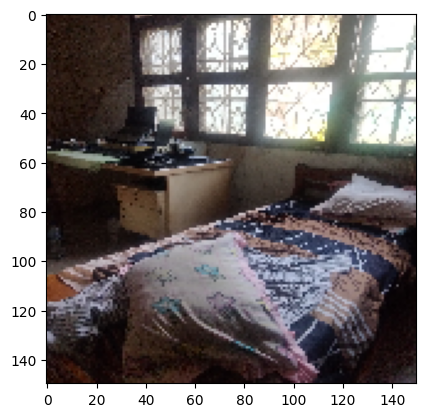

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Specify the path to your image
path = '../assets/bedroom2.jpg'

# Load the image from the specified path and resize it to 150x150 pixels
img = image.load_img(path, target_size=(150,150))

# Display the loaded image
imgplot = plt.imshow(img)

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a new dimension to the array. This is required because the model expects a batch of images, not a single image.
x = np.expand_dims(x, axis=0)

# Stack the image in a vertical sequence (required format for the model)
images = np.vstack([x])

# Use the model to predict the class of the image. The batch size is set to 10, meaning the model will predict classes for 10 images at a time.
classes = model.predict(images, batch_size=10)

# Print the path of the image
print(path)

# If the predicted class is 0, print 'clean'. Otherwise, print 'messy'.
if classes==0:
    print('clean')
else:
    print('messy')